In [1]:
import pymysql
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy import create_engine
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [8]:
new_df=df.filter(['SeniorCitizen','tenure','MonthlyCharges','Churn'], axis=1)

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [10]:
new_df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


In [11]:
y=new_df['Churn']

In [12]:
X=new_df.drop(['Churn'], axis=1)

In [13]:
# convert No Yes to 0 1
def YesNoto10(object):
    if object == 'Yes':
        return 1
    else:
        return 0

In [14]:
y=pd.Series(list(map(YesNoto10,y)))

In [15]:
X.shape

(7043, 3)

In [16]:
y.shape

(7043,)

In [17]:
#Scale the target variables

In [18]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns=['tenure', 'SeniorCitizen', 'MonthlyCharges'])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [21]:
logreg=LogisticRegression(max_iter=300) 

In [22]:
clf=logreg.fit(X_train,y_train)

In [23]:
y_pred=clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [51]:
accuracy_score(y_test,y_pred)

0.7827733080927591

In [52]:
confusion_matrix(y_test, y_pred)

array([[1409,  144],
       [ 315,  245]])

In [53]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

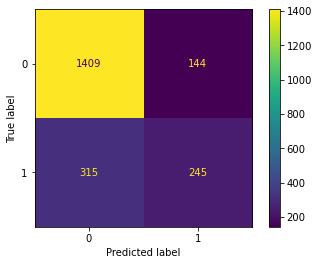

In [54]:
disp.plot()

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
import matplotlib.pyplot as plt

In [80]:
target_names =['No','Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1553
         Yes       0.63      0.44      0.52       560

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



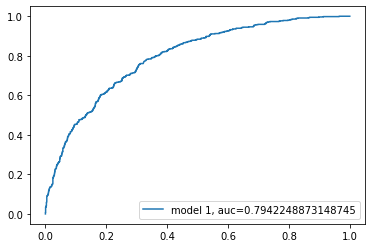

In [29]:
y_pred_probability=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test, y_pred_probability)
auc=roc_auc_score(y_test,y_pred_probability)
plt.plot(fpr,tpr,label='model 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [61]:
import imblearn

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
from sklearn.datasets import make_classification

In [64]:
from collections import Counter

Synthetic Minority Oversampling TEchnique (SMOTE)

In [65]:
smt=SMOTE()

In [66]:
X_tl, y_tl=smt.fit_resample(X,y)

In [67]:
y.shape

(7043,)

In [96]:
y_tl.shape

(10348,)

In [69]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [70]:
clf_tl=logreg.fit(X_train_tl,y_train_tl)

In [71]:
y_pred_tl=clf_tl.predict(X_test_tl)

In [73]:
accuracy_score(y_test_tl,y_pred_tl)

0.7320450885668277

In [75]:
cm = confusion_matrix(y_test_tl, y_pred_tl, labels=clf_tl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tl.classes_)

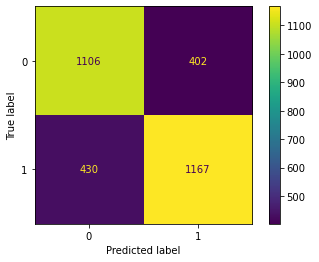

In [76]:
disp.plot()

In [81]:
target_names =['No','Yes']
print(classification_report(y_test_tl, y_pred_tl, target_names=target_names))

              precision    recall  f1-score   support

          No       0.72      0.73      0.73      1508
         Yes       0.74      0.73      0.74      1597

    accuracy                           0.73      3105
   macro avg       0.73      0.73      0.73      3105
weighted avg       0.73      0.73      0.73      3105



Tomek links

In [82]:
from imblearn.under_sampling import TomekLinks

In [97]:
tomek = TomekLinks()

In [98]:
X_tm, y_tm=tomek.fit_resample(X,y)

In [99]:
y.shape

(7043,)

In [100]:
y_tm.shape

(6563,)

In [101]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm = train_test_split(X_tm, y_tm, test_size=0.3, random_state=40)

In [102]:
clf_tm=logreg.fit(X_train_tm,y_train_tm)

In [103]:
y_pred_tm=clf_tm.predict(X_test_tm)

In [104]:
accuracy_score(y_test_tm,y_pred_tm)

0.7760284408329101

In [105]:
cm = confusion_matrix(y_test_tm, y_pred_tm, labels=clf_tm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tm.classes_)

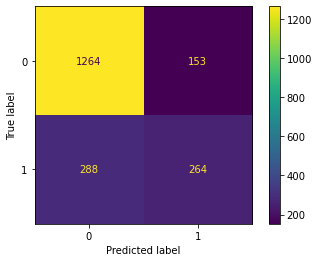

In [106]:
disp.plot()

In [107]:
target_names =['No','Yes']
print(classification_report(y_test_tm, y_pred_tm, target_names=target_names))

              precision    recall  f1-score   support

          No       0.81      0.89      0.85      1417
         Yes       0.63      0.48      0.54       552

    accuracy                           0.78      1969
   macro avg       0.72      0.69      0.70      1969
weighted avg       0.76      0.78      0.77      1969

